# Function

In [170]:
from sklearn import metrics
import matplotlib.pyplot as plt

def plotCM(y_test, y_pred, labels, size=(5,5)):

    confusion_matrix = metrics.confusion_matrix(y_pred, y_test) # invert exis from test, pred to pred test
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, 
                    display_labels = labels,)
    fig, ax = plt.subplots(figsize=size)
    cm_display.plot(ax=ax, xticks_rotation='vertical')
    plt.grid(False)
    # invert exis x,y
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

In [171]:
from sklearn.metrics import classification_report

def report(y_true, y_pred, labels) :
    print(classification_report(y_true, y_pred, target_names=labels))


In [172]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plotBarChart(courses, y_train):
    values = np.unique(y_train, return_counts=True)[1]
    data = {'class' : courses, 'value' : values}
    data = pd.DataFrame(data, index=courses)
    print(data)
    
    ax = data.plot(kind='bar', figsize=(3,3), color='maroon', legend=False, rot=0)
    ax.set_xlabel("Class")
    ax.set_ylabel("Number of sample data")
    ax.grid(True, zorder=0)
    ax.set_axisbelow(True)

    plt.show()

# Pre-processing

<h4> โหลดชุดข้อมูล </h4>

In [173]:
import pandas as pd
import numpy as np

In [174]:
data_sets = pd.read_csv('./cow.csv')

In [175]:
data_sets.columns

Index(['surgery', 'age', 'hospital_number', 'temperature', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome Class', 'surgical_lesion', 'lesion'],
      dtype='object')

In [176]:
data_sets.shape

(299, 25)

In [177]:
data_sets['outcome Class'].value_counts()

lived         178
died           77
euthanized     44
Name: outcome Class, dtype: int64

<h4> จัดการค่า NaN และ map input ให้เป็นตัวเลข </h4>

In [178]:
feture_cols = ['surgery', 
               'age', 
               'temperature', 
               'pulse', 
               'respiratory_rate', 
               'temp_of_extremities', 
               'peripheral_pulse', 
               'mucous_membrane', 
               'capillary_refill_time',
               'pain',
               'peristalsis',
               'abdominal_distention',
               'nasogastric_tube',
               'nasogastric_reflux',
               'rectal_exam_feces',
               'abdomen',
               'packed_cell_volume', 
               'total_protein', 
               'abdomo_appearance',
               'abdomo_protein',
               'surgical_lesion',
               'lesion', 
               'outcome Class']

In [179]:
df = data_sets[feture_cols].copy()
df.surgery = df.surgery.map({
    'no' : 0, 
    'yes' : 1
    })
df.age = df.age.map({
    'young' : 0, 
    'adult' : 1
    })
df.loc[df.temperature.isnull(), 'temperature'] = 37.8
df.loc[df.pulse.isnull(), 'pulse'] = int(np.random.randint(30, 40, size=1)) 
df.loc[df.respiratory_rate.isnull(), 'respiratory_rate'] = int(np.random.randint(8, 10, size=1)) 
df.temp_of_extremities = df.temp_of_extremities.map({
    'normal':0, 
    'warm':1, 
    'cool' : 2, 
    'cold' : 3,
    np.nan : 0,
    })
df.mucous_membrane = df.mucous_membrane.map({
    'normal_pink': 1, 
    'bright_pink': 2, 
    'pale_pink': 3,
    'pale_cyanotic':4, 
    'bright_red': 5, 
    'dark_cyanotic': 6,
    np.nan : 1
    })
df.peripheral_pulse = df.peripheral_pulse.map({
    'normal' : 1, 
    'increased' : 2, 
    'reduced' : 3, 
    'absent' : 4,
    np.nan : 1
    })
df.capillary_refill_time = df.capillary_refill_time.map({
    'less_3_sec' : 1,
    'more_3_sec' : 2,
    '3' : 2,
    np.nan : 1
})
df.pain = df.pain.map({
    'alert' : 1,
    'depressed' : 2,
    'extreme_pain' : 3,
    'mild_pain' : 4,
    'severe_pain' : 5,
    np.nan : 0
})
df.peristalsis = df.peristalsis.map({
    'hypermotile' : 1,
    'normal' : 2,
    'hypomotile' : 3,
    'absent' : 4,
    np.nan : 2
})
df.abdominal_distention = df.abdominal_distention.map({
    'none' : 1,
    'slight' : 2,
    'moderate' : 3,
    'severe' : 4,
    np.nan : 1
})
df.nasogastric_tube = df.nasogastric_tube.map({
    'none' : 1,
    'slight' : 2,
    'significant' : 3,
    np.nan : 1
})
df.nasogastric_reflux = df.nasogastric_reflux.map({
    'none' : 1,
    'more_1_liter' : 2,
    'less_1_liter' : 3,
    np.nan : 1
})
df.rectal_exam_feces = df.rectal_exam_feces.map({
    'normal' : 1,
    'increased' : 2,
    'decreased' : 3,
    'absent' : 4,
    np.nan : 1
})
df.abdomen = df.abdomen.map({
    'normal' : 1,
    'other' : 2,
    'firm' : 3,
    'distend_small' : 4,
    'distend_large' : 5,
    np.nan : 1
})
df.loc[df.packed_cell_volume.isnull(), 'packed_cell_volume'] = int(np.random.randint(30, 50, size=1)) 
df.loc[df.total_protein.isnull(), 'total_protein'] = float((7.5 - 6) * np.random.random_sample(1) + 6)
df.abdomo_appearance = df.abdomo_appearance.map({
    'clear' : 1,
    'cloudy' : 2,
    'serosanguious' : 3,
    np.nan : 1
})
df.loc[df.abdomo_protein.isnull(), 'abdomo_protein'] = 3
df.surgical_lesion = df.surgical_lesion.map({
    'yes' : 1,
    'no' : 2
})

# df = df.drop(df[df.isnull().sum(axis=1) > 0].index)

In [180]:
# check NaN
[df.isnull().sum(axis=0) > 0]

[surgery                  False
 age                      False
 temperature              False
 pulse                    False
 respiratory_rate         False
 temp_of_extremities      False
 peripheral_pulse         False
 mucous_membrane          False
 capillary_refill_time    False
 pain                     False
 peristalsis              False
 abdominal_distention     False
 nasogastric_tube         False
 nasogastric_reflux       False
 rectal_exam_feces        False
 abdomen                  False
 packed_cell_volume       False
 total_protein            False
 abdomo_appearance        False
 abdomo_protein           False
 surgical_lesion          False
 lesion                   False
 outcome Class            False
 dtype: bool]

In [181]:
# ดู feature ที่ไม่ได้นำมาใข้
[i for i in np.array(data_sets.columns) if i not in np.array(feture_cols)]

['hospital_number', 'nasogastric_reflux_ph']

In [182]:
df['outcome Class'].value_counts()

lived         178
died           77
euthanized     44
Name: outcome Class, dtype: int64

In [183]:
X = df
y = X['outcome Class'].values
X = X.drop(['outcome Class'], axis=1)

In [184]:
classes = ['lived', 'died', 'euthanized']

In [185]:
y[y=='lived'] = 1
y[y=='died'] = 2
y[y=='euthanized'] = 3
y = y.astype('int')

# Feature selection for classification

## Numerical feature 

Use LDA

In [186]:
feature_num = ['temperature', 'pulse', 'respiratory_rate', 'packed_cell_volume', 'total_protein', 'abdomo_protein']
X_num_feature = X[feature_num].copy()

In [187]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_num_scale = sc.fit_transform(X_num_feature)

In [188]:
X_num_scale = pd.DataFrame(X_num_scale, columns=feature_num)

In [189]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_num_select = lda.fit_transform(X_num_scale, y)

In [190]:
print('Original numerical feature number:', X_num_feature.shape[1])
print('Reduced numerical feature number:', X_num_select.shape[1])

Original numerical feature number: 6
Reduced numerical feature number: 2


In [192]:
# X_num_select = pd.DataFrame(X_num_select, columns=lda.get_feature_names_out())

## Nominal feature

Use Chi square

In [193]:
feature_nom = [i for i in np.array(X.columns) if i not in np.array(feature_num)]
X_nom_feature = X[feature_nom].copy()

In [194]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2_features = SelectKBest(chi2, k=12)
X_nom_select = chi2_features.fit_transform(X_nom_feature, y)

In [195]:
print('Original nominal feature number:', X_nom_feature.shape[1])
print('Reduced nominal feature number:', X_nom_select.shape[1])

Original nominal feature number: 16
Reduced nominal feature number: 12


In [197]:
# X_nom_select = pd.DataFrame(X_nom_select, columns=chi2_features.get_feature_names_out())

In [ ]:
X_num_select.shape, X_nom_select.shape

((299, 2), (299, 12))

รวม Numerical feature และ nominal feature ที่ได้ทำการ feature selection แล้ว

In [212]:
X_select = np.concatenate([X_num_select, X_nom_select], axis=1)

In [213]:
X_select.shape

(299, 14)

# แยกข้อมูลฝึก/ทดสอบ

In [214]:
# split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_select, y, test_size=0.2)

# ตัวแปรควบคุม

In [215]:
from matplotlib import pyplot as plt

In [216]:
param_grid = { 'criterion':['gini','entropy'], 'max_depth': np.arange(3, 100)}
cv = 10

In [217]:
ls_model = {
    'model_cv' : []
}

In [222]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn import tree

def bulidAndTrainModel(X_train, y_train) :
    dtree = DecisionTreeClassifier()
    dtree_gscv = GridSearchCV(dtree, param_grid, cv=cv)
    dtree_gscv.fit(X_train, y_train)
    print('best params : {}'.format(dtree_gscv.best_params_))
    print('best score : {}'.format(dtree_gscv.best_score_))

    ls_model['model_cv'].append(dtree_gscv)

    return dtree_gscv.best_estimator_

# การทดลองที่ 1

สร้างโมเดล Decision Tree เรียนรู้ชุดข้อมูลฝึกที่ยังไม่ได้ sampling

                 class  value
lived            lived    141
died              died     64
euthanized  euthanized     34


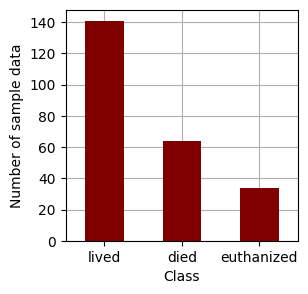

In [223]:
plotBarChart(classes, y_train)

In [224]:

model_1 = bulidAndTrainModel(X_train, y_train)

best params : {'criterion': 'entropy', 'max_depth': 65}
best score : 0.6567028985507246


[Text(0.5444972826086957, 0.9615384615384616, 'x[0] <= 0.441\nentropy = 1.358\nsamples = 239\nvalue = [141, 64, 34]'),
 Text(0.30095108695652173, 0.8846153846153846, 'x[13] <= 900.0\nentropy = 1.061\nsamples = 164\nvalue = [123, 21, 20]'),
 Text(0.22735507246376813, 0.8076923076923077, 'x[0] <= 0.06\nentropy = 0.144\nsamples = 49\nvalue = [48, 1, 0]'),
 Text(0.2128623188405797, 0.7307692307692307, 'entropy = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(0.2418478260869565, 0.7307692307692307, 'x[0] <= 0.077\nentropy = 0.439\nsamples = 11\nvalue = [10, 1, 0]'),
 Text(0.22735507246376813, 0.6538461538461539, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.2563405797101449, 0.6538461538461539, 'entropy = 0.0\nsamples = 10\nvalue = [10, 0, 0]'),
 Text(0.3745471014492754, 0.8076923076923077, 'x[1] <= 0.786\nentropy = 1.28\nsamples = 115\nvalue = [75, 20, 20]'),
 Text(0.29981884057971014, 0.7307692307692307, 'x[0] <= -0.62\nentropy = 1.191\nsamples = 86\nvalue = [58, 20, 8]'),
 Te

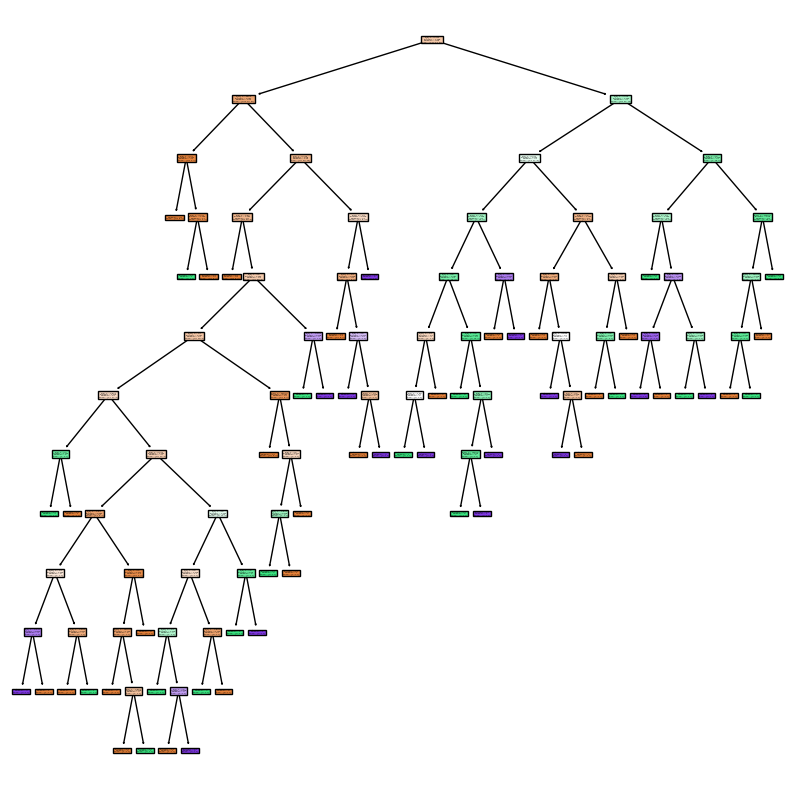

In [225]:
fig = plt.figure(figsize=(10,10))
tree.plot_tree(model_1, filled=True)

In [226]:
y_pred_1 = model_1.predict(X_test)
report(y_pred_1, y_test, classes)

              precision    recall  f1-score   support

       lived       0.78      0.71      0.74        41
        died       0.46      0.50      0.48        12
  euthanized       0.40      0.57      0.47         7

    accuracy                           0.65        60
   macro avg       0.55      0.59      0.56        60
weighted avg       0.67      0.65      0.66        60



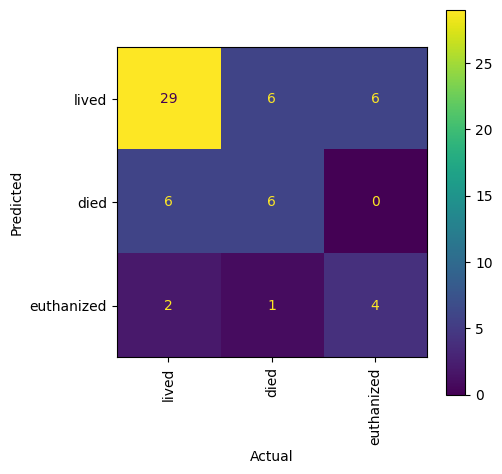

In [227]:
plotCM(y_test=y_test, y_pred=y_pred_1, labels=classes)

## สรุปการทดลองที่ 1

จากการทดลองที่ 1 จะเห็นได้ว่าประสิทธภาพของโมเดลนั้นค่อนข้างดี แต่เมื่อสังเกต confusion matrix จะพบว่าข้อมูลตัวอย่างส่วนใหญ่จะอยู่ใน class lived ซึ่งเป็นปัญหา Imbalance

# การทดลองเพื่อแก้ปัญหา Imblance dataset

## Random sampling

In [228]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_res_random,y_res_random = ros.fit_resample(X_train,y_train)

                 class  value
lived            lived    141
died              died    141
euthanized  euthanized    141


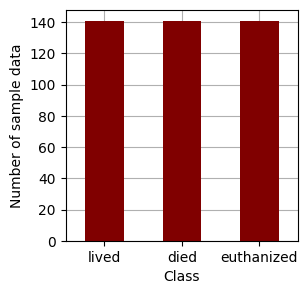

In [229]:
plotBarChart(classes, y_res_random)

In [230]:
model_randoms = bulidAndTrainModel(X_res_random, y_res_random)


best params : {'criterion': 'entropy', 'max_depth': 93}
best score : 0.9104651162790697


In [231]:
y_pred_res_rand = model_randoms.predict(X_test)
report(y_test, y_pred_res_rand, classes)

              precision    recall  f1-score   support

       lived       0.73      0.65      0.69        37
        died       0.39      0.54      0.45        13
  euthanized       0.33      0.30      0.32        10

    accuracy                           0.57        60
   macro avg       0.48      0.50      0.48        60
weighted avg       0.59      0.57      0.57        60



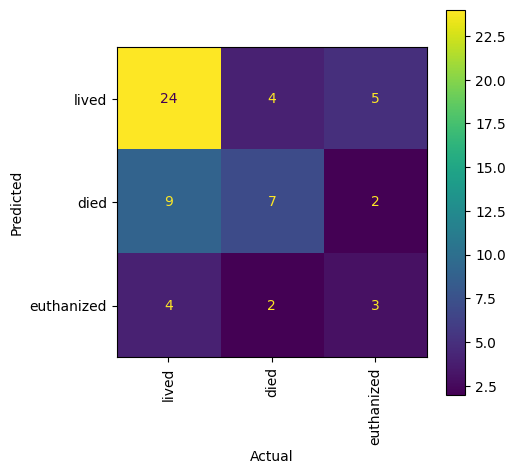

In [232]:
plotCM(y_test=y_test, y_pred=y_pred_res_rand, labels=classes)

## use oversampling using SMOTE to increase data for training set 

In [233]:
from imblearn .over_sampling import SMOTE

sm = SMOTE()
X_resampled_smote, y_resampled_smote = sm.fit_resample(X_train,y_train)

                 class  value
lived            lived    141
died              died    141
euthanized  euthanized    141


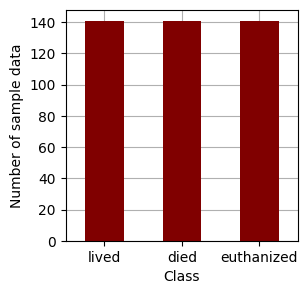

In [234]:
plotBarChart(classes, y_resampled_smote)

In [235]:
model_smote = bulidAndTrainModel(X_resampled_smote, y_resampled_smote)

best params : {'criterion': 'gini', 'max_depth': 42}
best score : 0.7619047619047619


In [236]:
y_pred_smote = model_smote.predict(X_test)
report(y_pred_smote, y_test, classes)

              precision    recall  f1-score   support

       lived       0.73      0.73      0.73        37
        died       0.46      0.38      0.41        16
  euthanized       0.20      0.29      0.24         7

    accuracy                           0.58        60
   macro avg       0.46      0.46      0.46        60
weighted avg       0.60      0.58      0.59        60



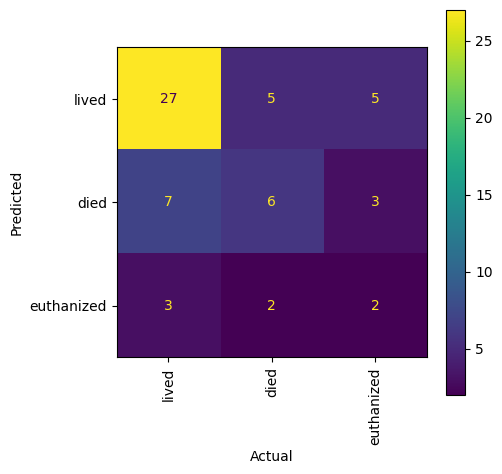

In [237]:
plotCM(y_test=y_test, y_pred=y_pred_smote, labels=classes)

## Tomek

In [238]:
from collections import Counter
from imblearn.under_sampling import TomekLinks

In [239]:
tl = TomekLinks()
X_res_tomek, y_res_tomek = tl.fit_resample(X_train, y_train)

                 class  value
lived            lived    123
died              died     49
euthanized  euthanized     34


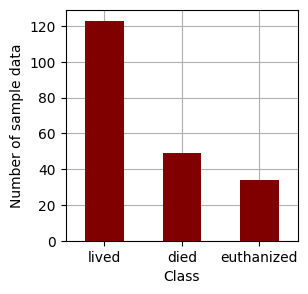

In [240]:
plotBarChart(classes, y_res_tomek)

In [241]:
model_tomek = bulidAndTrainModel(X_res_tomek, y_res_tomek)

best params : {'criterion': 'entropy', 'max_depth': 6}
best score : 0.7145238095238095


In [242]:
y_pred_tomek = model_tomek.predict(X_test)
report(y_test, y_pred_tomek, classes)

              precision    recall  f1-score   support

       lived       0.76      0.92      0.83        37
        died       0.55      0.46      0.50        13
  euthanized       1.00      0.40      0.57        10

    accuracy                           0.73        60
   macro avg       0.77      0.59      0.63        60
weighted avg       0.75      0.73      0.71        60



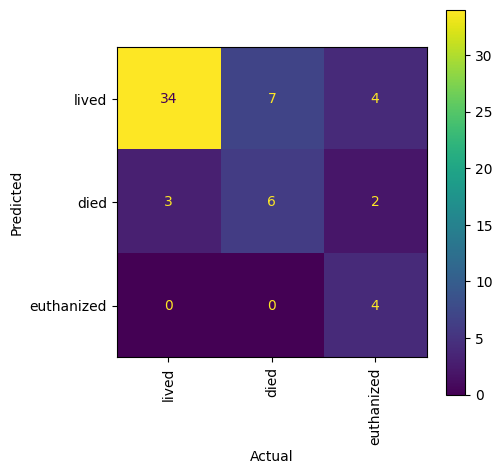

In [243]:
plotCM(y_test, y_pred_tomek, classes)

## ADASYN

In [244]:
from imblearn.over_sampling import ADASYN

In [245]:
ad = ADASYN()
X_res_adasyn, y_res_adasyn = ad.fit_resample(X_train, y_train)

                 class  value
lived            lived    141
died              died    137
euthanized  euthanized    141


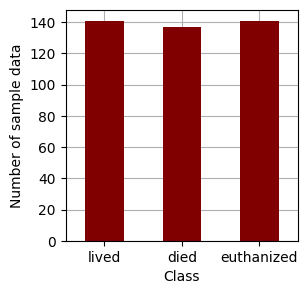

In [246]:
plotBarChart(classes, y_res_adasyn)

In [247]:
model_adasyn = bulidAndTrainModel(X_res_adasyn, y_res_adasyn)

best params : {'criterion': 'entropy', 'max_depth': 46}
best score : 0.7113821138211381


In [248]:
y_pred_adasyn = model_adasyn.predict(X_test)
report(y_test, y_pred_adasyn, classes)

              precision    recall  f1-score   support

       lived       0.77      0.73      0.75        37
        died       0.47      0.62      0.53        13
  euthanized       0.25      0.20      0.22        10

    accuracy                           0.62        60
   macro avg       0.50      0.52      0.50        60
weighted avg       0.62      0.62      0.62        60



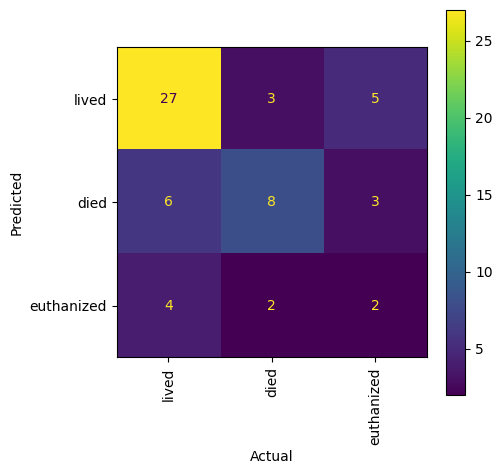

In [249]:
plotCM(y_test, y_pred_adasyn, classes)

# สรุปผลการทดลอง

In [250]:
index = ['On sampling', 'Random', 'SMOT', 'TOMEK', 'ADASYN']

ls_reslut_pred = [
    y_pred_1,
    y_pred_res_rand,
    y_pred_smote,
    y_pred_tomek,
    y_pred_adasyn ,
]

In [251]:
from sklearn import metrics

# accuarcy
accuarcy = []
for pred in ls_reslut_pred :
    accuarcy.append(metrics.accuracy_score(y_test, pred))
    
# recall
recall = []
for pred in ls_reslut_pred :
    recall.append(metrics.recall_score(y_test, pred, average='weighted'))

# F1
f1 = []
for pred in ls_reslut_pred :
    f1.append(metrics.f1_score(y_test, pred, average='weighted'))
    
# precision
precision = []
for pred in ls_reslut_pred :
    precision.append(metrics.precision_score(y_test, pred, average='weighted'))

เปรียบเทียบประสิทธิภาพโมเดลระหว่างชุดข้อมูงเรียนรู้และชุดข้อมูลทดสอบ

In [252]:
acc_train_socre = []
for g_cv in ls_model['model_cv']:
    acc_train_socre.append(g_cv.best_score_)
    
score_train_test = pd.DataFrame({
    'train accuracy' : acc_train_socre,
    'test accuracy' : accuarcy
}, index=index)

score_train_test

,train accuracy,test accuracy
On sampling,0.656703,0.650000
Random,0.910465,0.566667
SMOT,0.761905,0.583333
TOMEK,0.714524,0.733333
ADASYN,0.711382,0.616667


<bound method Axes.plot of <AxesSubplot: title={'center': 'Compare the model performance between\n the learning data set and the test data set.'}>>

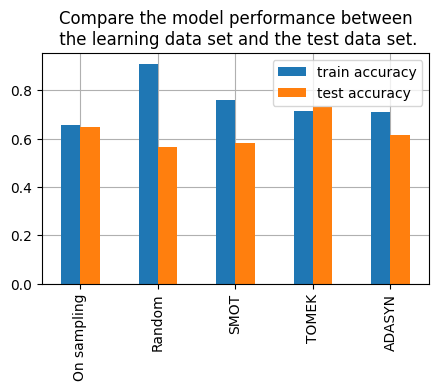

In [253]:
ax = score_train_test.plot(kind='bar', figsize=(5,3))
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_title('Compare the model performance between\n the learning data set and the test data set.')
ax.grid(True, zorder=0)
ax.set_axisbelow(True)
ax.plot

เปรียบเทียบประสิทธิภาพของโมเดลทั้งหมด

In [254]:
data_scores = pd.DataFrame(
    data={
    'accuarcy' : accuarcy,
    'recall' : recall,
    'F1' : f1,
    'precision' : precision
    }, index=index)

data_scores

,accuarcy,recall,F1,precision
On sampling,0.650000,0.650000,0.640978,0.639750
Random,0.566667,0.566667,0.573338,0.588300
SMOT,0.583333,0.583333,0.578871,0.578869
TOMEK,0.733333,0.733333,0.714954,0.750774
ADASYN,0.616667,0.616667,0.615093,0.619342


<bound method Axes.plot of <AxesSubplot: title={'center': 'Compare the performance of all models.'}>>

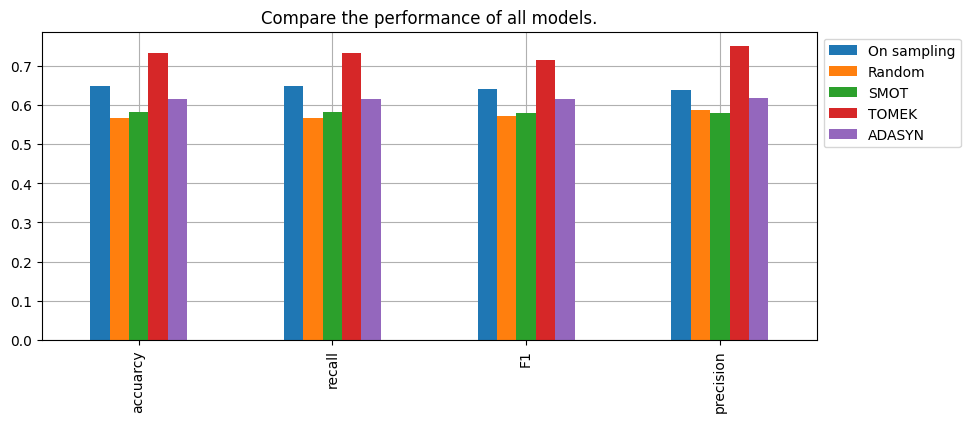

In [255]:
# performance บน test set
ax = data_scores.T.plot(kind='bar', figsize=(10,4))
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_title('Compare the performance of all models.')
ax.grid(True, zorder=0)
ax.set_axisbelow(True)
ax.plot